# cf-python exercises 3

In [1]:
# import the cf package
import cf
cf.__version__

'2.1.1'

In [2]:
# Read the field from file ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc
f = cf.read_field('ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(1), latitude(145), longitude(192)) K2
Cell methods   : time: mean (interval: 30 minutes) time: variance
Axes           : height(1) = [2.0] m
               : time(1) = [1964-12-01T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



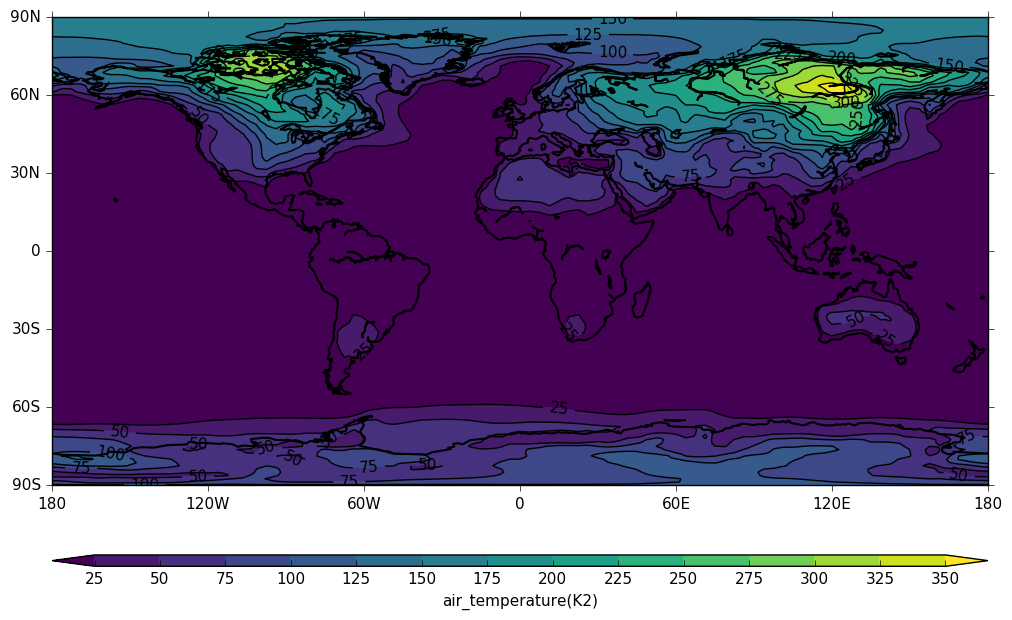

In [3]:
# Find the temporal variance at each XY location and plot the result
# (use the field's "collapse" method with the argument 'T: variance')
v = f.collapse('T: variance')
print v
%matplotlib inline
import cfplot as cfp
cfp.con(v)

In [4]:
# Find the time mean at each X-Y point
# (use the field's "collapse" method wit the argument 'T: mean')
t_mean = f.collapse('T: mean')
print t_mean

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes) time: mean
Axes           : height(1) = [2.0] m
               : time(1) = [1964-12-01T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



In [5]:
# Calculate the global mean for each time and print the values for the first 12 times
# (use specify the operation as 'X: Y: mean', or equivalently 'area: mean')
x = f.collapse('X: Y: mean')
print x.array[:12]

[[[ 275.14305112]]

 [[ 275.07955644]]

 [[ 275.08529227]]

 [[ 275.29717096]]

 [[ 276.82129897]]

 [[ 278.13823508]]

 [[ 279.43361836]]

 [[ 280.03470329]]

 [[ 279.58226719]]

 [[ 278.39334869]]

 [[ 276.5805792 ]]

 [[ 275.24783543]]]


In [6]:
# Calculate the weighted global mean for each time and print the valuesfor the first 12 times
# (use the "weights" parameter of the field's collapse method with the
# value ['X', 'Y'] or equivelently the value 'area')
x = f.collapse('area: mean', weights='area')
print x.array[:12]

[[[ 283.8122294 ]]

 [[ 283.709302  ]]

 [[ 284.18888204]]

 [[ 284.96334437]]

 [[ 286.19907216]]

 [[ 286.96110774]]

 [[ 287.64243518]]

 [[ 288.18234269]]

 [[ 288.00099162]]

 [[ 287.25347405]]

 [[ 285.87638167]]

 [[ 284.57930887]]]


In [7]:
# For each time find the range spanned by the zonal means 
# (use the argument 'X: mean Y: range')
g = f.collapse('X: mean Y: range', weights='X')
print g
print g.data

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(1), longitude(1)) K
Cell methods   : time: mean (interval: 30 minutes) longitude: mean latitude: range
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(1) = [0.0] degrees_north
               : longitude(1) = [179.0625] degrees_east

[[[53.7120116552, ..., 65.1269480839]]] K


In [8]:
# Find the temporal minimum of the latitudinal maxima of the longitudinal means 
print f
g = f.collapse('X: mean Y: max T: minimum', weights=['X', 'Y', 'T'])
print g.array

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east

[[[ 297.71326639]]]


## Calculate anomalies from the mean

In [9]:
# Find the time average at each X-Y location, weighted by month lengths
t_mean = f.collapse('T: mean', weights='T')
print t_mean

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes) time: mean
Axes           : height(1) = [2.0] m
               : time(1) = [1964-12-01T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



In [10]:
# For each element of the original field, calculate the anomaly from the temporal mean
# and print its array of values 
# (use simple subtraction)
t_anom = f - t_mean
print t_anom
print t_anom.array

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes)
Axes           : height(1) = [2.0] m
               : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east

[[[ 17.23374316  17.23374316  17.23374316 ...,  17.23374316  17.23374316
    17.23374316]
  [ 15.1198893   15.11096985  15.10127152 ...,  15.15195753  15.13956857
    15.13011486]
  [ 14.6592992   14.66458582  14.66969063 ...,  14.62081899  14.61362175
    14.63668101]
  ..., 
  [ -8.06449489  -8.07036848  -8.07707876 ...,  -8.03082001  -8.03393452
    -8.04885026]
  [ -7.99935323  -7.99810691  -7.99668703 ...,  -7.99322772  -7.99598733
    -7.99775713]
  [ -8.4711552   -8.4711552   -8.4711552  ...,  -8.4711552   -8.4711552
    -8.4711552

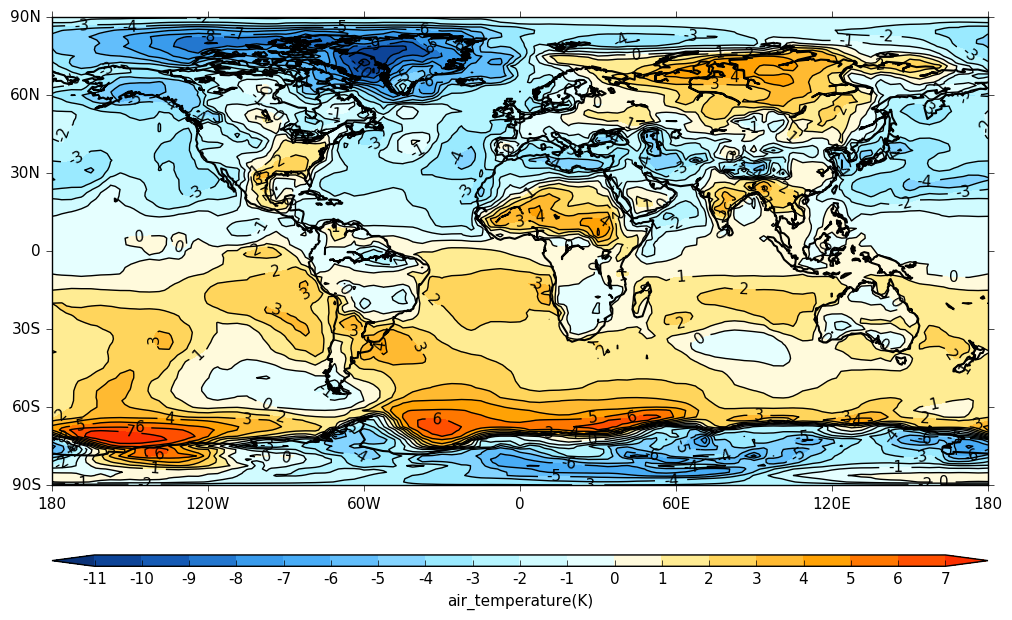

In [11]:
# Plot the anomaly from the mean for the month of April 1966
# (April 1966 may be specified as cf.month(4) & cf.year(1966))
cfp.con(t_anom.subspace(T=cf.month(4) & cf.year(1966)))

## Climatological time statistics

Field: air_temperature (ncvar%tas)
----------------------------------
Data           : air_temperature(time(4), latitude(145), longitude(192)) K
Cell methods   : time: mean (interval: 30 minutes) time: minimum within years time: mean over years
Axes           : height(1) = [2.0] m
               : time(4) = [1960-01-15T00:00:00Z, ..., 1960-10-16T12:00:00Z] 365_day
               : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east



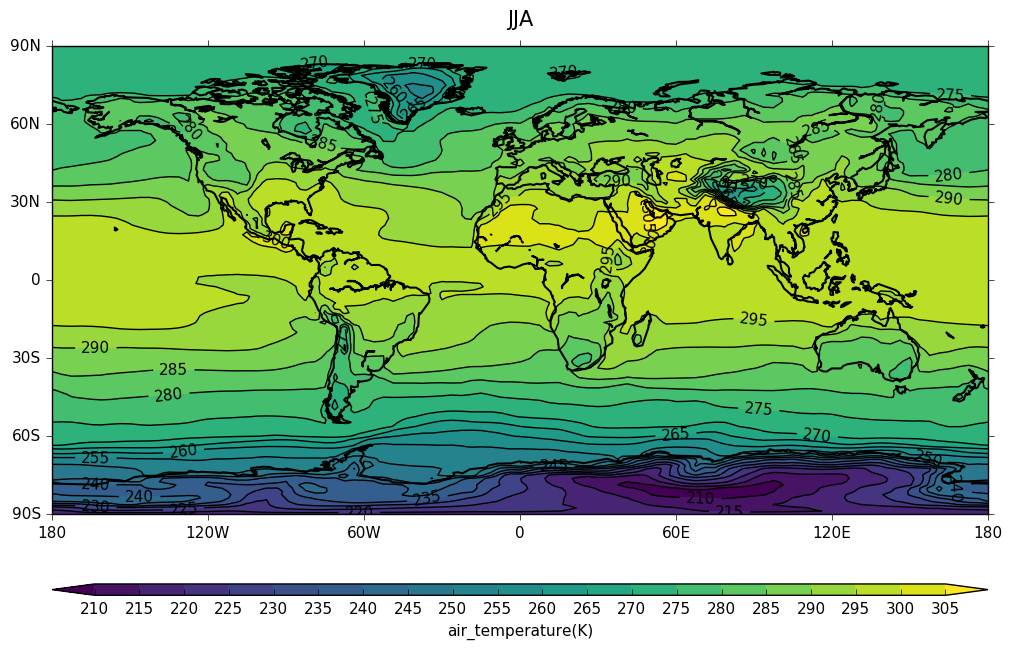

In [12]:
# Find the multiannual average of the seasonal (DJF, MAM, etc.) minima and plot the result for JJA 
# (use the special argument 'T: minimum within years T: mean over years' to the field's "collapse" method.
#  This also requires the "within_years" parameter to define over which periods to take the minima within each year.
#  Set this parameter to cf.seasons(), which will specify the four seasons of DJF, MAM, JJA, SON)
g = f.collapse('T: minimum within years T: mean over years', within_years=cf.seasons())
print g
cfp.con(g.subspace(T=cf.month(cf.wi(6, 8))), title='JJA')

In [13]:
# Print the new field's time cordiante values and their bounds - note that the bounds span the full 10 years,
# but the coordinate values themselves lie in the correct season of the first year
print g.coord('T').dtarray
print g.coord('T').bounds.dtarray

[<CF Datetime: 1960-01-15T00:00:00Z 365_day>
 <CF Datetime: 1960-04-16T00:00:00Z 365_day>
 <CF Datetime: 1960-07-17T00:00:00Z 365_day>
 <CF Datetime: 1960-10-16T12:00:00Z 365_day>]
[[<CF Datetime: 1959-12-01T00:00:00Z 365_day>
  <CF Datetime: 1969-03-01T00:00:00Z 365_day>]
 [<CF Datetime: 1960-03-01T00:00:00Z 365_day>
  <CF Datetime: 1969-06-01T00:00:00Z 365_day>]
 [<CF Datetime: 1960-06-01T00:00:00Z 365_day>
  <CF Datetime: 1969-09-01T00:00:00Z 365_day>]
 [<CF Datetime: 1960-09-01T00:00:00Z 365_day>
  <CF Datetime: 1969-12-01T00:00:00Z 365_day>]]


## Cell methods: describing the variation of the quantity within cells

http://cfconventions.org/Data/cf-conventions/cf-conventions-1.7/cf-conventions.html#cell-methods

In [14]:
# Inspect the original and new fields' cell methods, that describe the variation of the quantity within cells,
# i.e. a record of the collapses that have been performed
# (use the cell_methods attribute of the field)
print f.cell_methods
print g.cell_methods

time: mean (interval: 30 minutes)
time: mean (interval: 30 minutes) time: minimum within years time: mean over years


## Cell areas and weights

Field: area (ncvar%tas)
-----------------------
Data           : area(latitude(145), longitude(192)) m2
Cell methods   : mean
Axes           : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east

[[  7.90324668e+07   7.90324668e+07   7.90324668e+07 ...,   7.90324668e+07
    7.90324668e+07   7.90324668e+07]
 [  6.32203311e+08   6.32203311e+08   6.32203311e+08 ...,   6.32203311e+08
    6.32203311e+08   6.32203311e+08]
 [  1.26410573e+09   1.26410573e+09   1.26410573e+09 ...,   1.26410573e+09
    1.26410573e+09   1.26410573e+09]
 ..., 
 [  1.26410573e+09   1.26410573e+09   1.26410573e+09 ...,   1.26410573e+09
    1.26410573e+09   1.26410573e+09]
 [  6.32203311e+08   6.32203311e+08   6.32203311e+08 ...,   6.32203311e+08
    6.32203311e+08   6.32203311e+08]
 [  7.90324668e+07   7.90324668e+07   7.90324668e+07 ...,   7.90324668e+07
    7.90324668e+07   7.90324668e+07]]


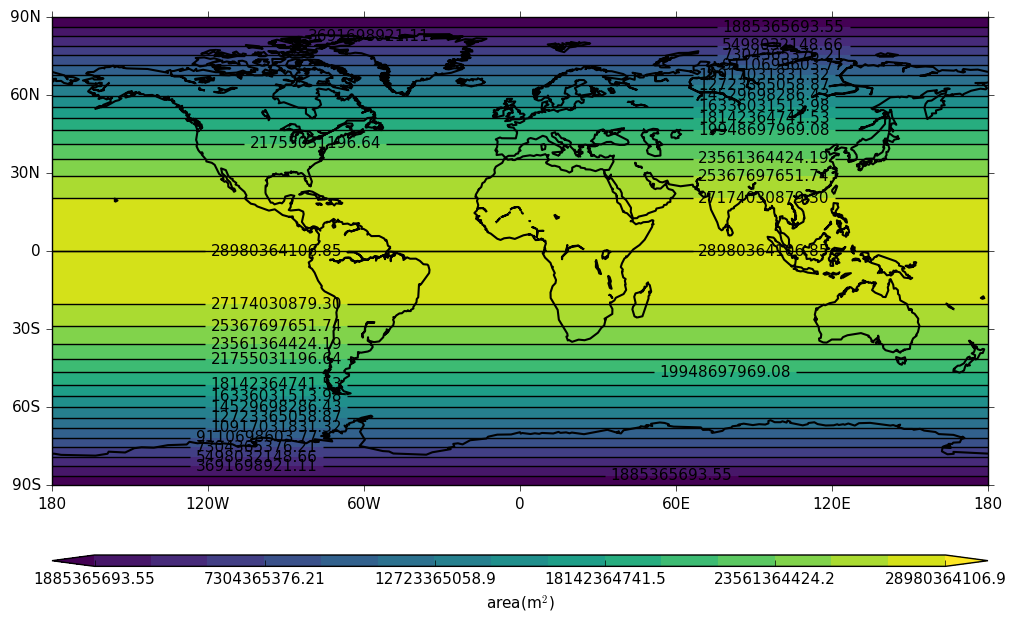

In [15]:
# Find and plot the horizontal cell areas of the field
# (use the field's "cell_area" method)
area = f.cell_area()
print area
print area.array
cfp.con(area)

Field: long_name:weights (ncvar%tas)
------------------------------------
Data           : long_name:weights(time(120)) d
Cell methods   : time: mean (interval: 30 minutes)
Axes           : time(120) = [1959-12-16T12:00:00Z, ..., 1969-11-16T00:00:00Z] 365_day

[ 31.  31.  28.  31.  30.  31.  30.  31.  31.  30.  31.  30.  31.  31.  28.
  31.  30.  31.  30.  31.  31.  30.  31.  30.  31.  31.  28.  31.  30.  31.
  30.  31.  31.  30.  31.  30.  31.  31.  28.  31.  30.  31.  30.  31.  31.
  30.  31.  30.  31.  31.  28.  31.  30.  31.  30.  31.  31.  30.  31.  30.
  31.  31.  28.  31.  30.  31.  30.  31.  31.  30.  31.  30.  31.  31.  28.
  31.  30.  31.  30.  31.  31.  30.  31.  30.  31.  31.  28.  31.  30.  31.
  30.  31.  31.  30.  31.  30.  31.  31.  28.  31.  30.  31.  30.  31.  31.
  30.  31.  30.  31.  31.  28.  31.  30.  31.  30.  31.  31.  30.  31.  30.]


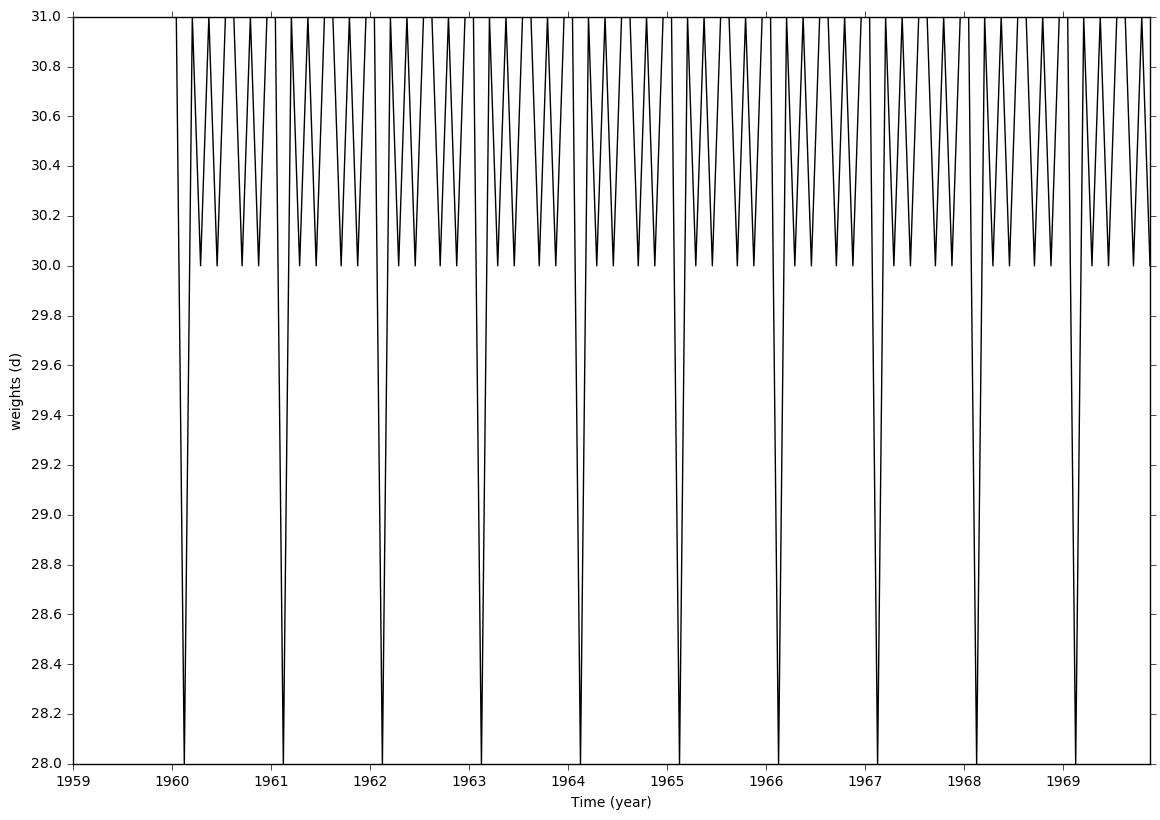

In [16]:
# Find the weights used in time axis collapses
# (use the field's weights method and the cfp.lineplot function on the result)
w = f.weights('T')
print w
print w.array
cfp.lineplot(w)

In [17]:
# Find the weights used in area collapses
# (use the field's weights method)
w = f.weights('area')
print w
print w.array

Field: long_name:weights (ncvar%tas)
------------------------------------
Data           : long_name:weights(latitude(145), longitude(192)) rad
Cell methods   : mean
Axes           : latitude(145) = [-90.0, ..., 90.0] degrees_north
               : longitude(192) = [0.0, ..., 358.125] degrees_east

[[  1.94696932e-06   1.94696932e-06   1.94696932e-06 ...,   1.94696932e-06
    1.94696932e-06   1.94696932e-06]
 [  1.55743645e-05   1.55743645e-05   1.55743645e-05 ...,   1.55743645e-05
    1.55743645e-05   1.55743645e-05]
 [  3.11413165e-05   3.11413165e-05   3.11413165e-05 ...,   3.11413165e-05
    3.11413165e-05   3.11413165e-05]
 ..., 
 [  3.11413165e-05   3.11413165e-05   3.11413165e-05 ...,   3.11413165e-05
    3.11413165e-05   3.11413165e-05]
 [  1.55743645e-05   1.55743645e-05   1.55743645e-05 ...,   1.55743645e-05
    1.55743645e-05   1.55743645e-05]
 [  1.94696932e-06   1.94696932e-06   1.94696932e-06 ...,   1.94696932e-06
    1.94696932e-06   1.94696932e-06]]


In [18]:
# Look at the help page for the collapse method
help(f.collapse)

Help on method collapse in module cf.field:

collapse(self, method, axes=None, squeeze=False, mtol=1, weights=None, ddof=1, a=None, i=False, group=None, regroup=False, within_days=None, within_years=None, over_days=None, over_years=None, coordinate='mid_range', group_by='coords', _debug=False, **kwargs) method of cf.field.Field instance
    Collapse axes of the field.
    
    Collapsing an axis involves reducing its size with a given (typically
    statistical) method.
    
    By default all axes with size greater than 1 are collapsed completely
    with the given method. For example, to find the minumum of the data
    array:
    
    >>> g = f.collapse('min')
    
    By default the calculations of means, standard deviations and
    variances are not weighted. For example to find the mean of the data
    array, non-weighted:
    
    >>> g = f.collapse('mean')
    
    Specific weights may be forced with the weights parameter. For example
    to find the variance of the data array,